Purpose of the Project
- The purpose of this project is to investigate the role of epigenetic alterations, particularly DNA methylation (DNAm), in the aging process and its   implications for healthspan and disease susceptibility. By analyzing DNAm patterns across different age groups and correlating them with biological aging, we aim to identify specific CpG sites that serve as reliable biomarkers of aging. This research will deepen our understanding of the molecular mechanisms underlying aging, potentially revealing new targets for therapeutic interventions aimed at slowing down the aging process and promoting healthy aging. Ultimately, this project seeks to contribute to the development of personalized approaches to healthcare that take into account individuals' biological age and genetic predispositions for age-related diseases.

In [8]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load DNAm data


In [9]:
import pickle

# Specify the file path
file_path = 'GSE42861.pkl'

# Load pickled data
try:
    with open(file_path, 'rb') as infile:
        DNA_data = pickle.load(infile)
        print("DNA data successfully loaded!")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except pickle.UnpicklingError as e:
    print(f"Error: Unable to unpickle data - {e}")
except Exception as e:
    print(f"An error occurred: {e}")


DNA data successfully loaded!


In [10]:
DNA_data.head(2)

,dataset,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,cg14156381,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
GSM1051525,GSE42861,67.0,F,0.34637,0.177525,0.073021,0.818903,0.167119,0.096741,0.431846,...,0.121812,0.204383,0.867147,0.235479,0.836472,0.793045,0.067196,0.072223,0.083744,0.265790
GSM1051526,GSE42861,49.0,F,0.36717,0.183482,0.084641,0.850975,0.251110,0.074172,0.456439,...,0.100869,0.197570,0.865686,0.230336,0.858362,0.798864,0.072268,0.069718,0.096331,0.283381


In [11]:
DNA_data.shape

(689, 18613)

# Load metadata
## The metadata offers information for subject descriptions. You can utilize some features to enhance your model training.

In [12]:
import pickle

# Specify the file path (adjust the file name if necessary)
file_path = 'GSE42861_metadata_2023.pkl'

# Load pickled data
try:
    with open(file_path, 'rb') as infile:
        DNA_metadata = pickle.load(infile)
        print("DNA metadata successfully loaded!")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except pickle.UnpicklingError as e:
    print(f"Error: Unable to unpickle data - {e}")
except Exception as e:
    print(f"An error occurred: {e}")


DNA metadata successfully loaded!


In [13]:
DNA_metadata.head(10)

,GEO Accession,Disease State,Subject,Age,Gender,Smoking Status
GSM1051525,GSM1051525,rheumatoid arthritis,Patient,67,f,current
GSM1051526,GSM1051526,rheumatoid arthritis,Patient,49,f,current
GSM1051527,GSM1051527,rheumatoid arthritis,Patient,53,f,ex
GSM1051528,GSM1051528,rheumatoid arthritis,Patient,62,f,current
GSM1051529,GSM1051529,rheumatoid arthritis,Patient,33,f,never
GSM1051530,GSM1051530,rheumatoid arthritis,Patient,59,f,current
GSM1051531,GSM1051531,rheumatoid arthritis,Patient,66,f,never
GSM1051532,GSM1051532,rheumatoid arthritis,Patient,51,f,ex
GSM1051533,GSM1051533,Normal,Normal,55,m,current
GSM1051534,GSM1051534,Normal,Normal,37,m,never


# DNA_metadata
*   GEO Accession: Subject ID
*   Disease State: **the disease name** or  **Normal**
*   Subject: **Patient** or **Normal**
*   Age: age of the subject
*   Gender: **f** or **m**, we can ignore this feature in this project.
*   Smoking State:

      ex: previously smoked

      current: currently smoking

      never: no history of smoking
      
      occasional: occational smoking



In [14]:
DNA_metadata.shape

(689, 6)

Q.No.1 Conduct thorough Exploratory Data Analysis (EDA)

In [15]:
# Understand the Data
print(DNA_metadata.shape)
print(DNA_data.shape)
print(DNA_metadata.info())
print(DNA_data.info())

(689, 6)
(689, 18613)
<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, GSM1051525 to GSM1052213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO Accession   689 non-null    object
 1   Disease State   689 non-null    object
 2   Subject         689 non-null    object
 3   Age             689 non-null    object
 4   Gender          689 non-null    object
 5   Smoking Status  689 non-null    object
dtypes: object(6)
memory usage: 37.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, GSM1051525 to GSM1052213
Columns: 18613 entries, dataset to cg05593325
dtypes: float64(18611), object(2)
memory usage: 97.8+ MB
None


In [16]:
# Handle missing values
DNA_metadata = DNA_metadata.dropna()
DNA_data = DNA_data.dropna()

In [17]:
# Descriptive Statistics
# displaying all summary statistics
print("\nDNA Data Summary Statistics:")
print(DNA_data.describe())


DNA Data Summary Statistics:
              age  cg04601137  cg10064162  cg17559549  cg12441964  cg21493583  \
count  689.000000  689.000000  689.000000  689.000000  689.000000  689.000000   
mean    51.930334    0.338468    0.166053    0.086099    0.827663    0.179404   
std     11.795659    0.038610    0.044347    0.017590    0.021486    0.039530   
min     18.000000    0.150789    0.062523    0.041095    0.754965    0.074993   
25%     45.000000    0.315232    0.138191    0.073084    0.811928    0.154597   
50%     54.000000    0.340015    0.159454    0.084679    0.826675    0.175820   
75%     61.000000    0.363490    0.184654    0.096301    0.842737    0.198103   
max     70.000000    0.516413    0.467596    0.152492    0.915956    0.360854   

       cg27318546  cg14156381  cg08332868  cg06307601  ...  cg06291595  \
count  689.000000  689.000000  689.000000  689.000000  ...  689.000000   
mean     0.075722    0.449283    0.064011    0.098119  ...    0.111154   
std      0.017168 

In [18]:
# displaying summary statistics for features starting with 'cg'
cg_features = [col for col in DNA_data.columns if col.startswith('cg')]
print("\nSummary Statistics for 'cg' Features:")
print(DNA_data[cg_features].describe())


Summary Statistics for 'cg' Features:
       cg04601137  cg10064162  cg17559549  cg12441964  cg21493583  cg27318546  \
count  689.000000  689.000000  689.000000  689.000000  689.000000  689.000000   
mean     0.338468    0.166053    0.086099    0.827663    0.179404    0.075722   
std      0.038610    0.044347    0.017590    0.021486    0.039530    0.017168   
min      0.150789    0.062523    0.041095    0.754965    0.074993    0.033812   
25%      0.315232    0.138191    0.073084    0.811928    0.154597    0.063496   
50%      0.340015    0.159454    0.084679    0.826675    0.175820    0.072503   
75%      0.363490    0.184654    0.096301    0.842737    0.198103    0.084900   
max      0.516413    0.467596    0.152492    0.915956    0.360854    0.139412   

       cg14156381  cg08332868  cg06307601  cg15300989  ...  cg06291595  \
count  689.000000  689.000000  689.000000  689.000000  ...  689.000000   
mean     0.449283    0.064011    0.098119    0.055565  ...    0.111154   
std      

Q.No.2 Feature deduction methods

2.1. Feature_set_1:

i. Use machine learning algorithms such as Logistic regression,
Random Forest, or Gradient Boosting etc., to rank features based on
their importance.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

In [23]:
# Step 1: Split the data into features (X) and target variable (y)
X = DNA_data.loc[:, DNA_data.columns.str.startswith('cg')]
y = DNA_metadata['Disease State']  # or 'Age' depending on the target variable

In [24]:
# Step 2: Preprocess the data if necessary (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Step 3: Train machine learning models and extract feature importance
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [26]:
# Initialize empty dictionary to store feature importances
feature_importances = {}

In [27]:
# Fit and extract feature importances for Random Forest and Gradient Boosting
for model_name, model in models.items():
    if model_name in ['Random Forest', 'Gradient Boosting']:
        model.fit(X_scaled, y)
        feature_importances[model_name] = model.feature_importances_

In [28]:
from sklearn.feature_selection import SelectFromModel
# Feature selection for Logistic Regression
if 'Logistic Regression' in models:
    # Perform feature selection using SelectFromModel
    selector = SelectFromModel(LogisticRegression(max_iter=10000)).fit(X_scaled, y)
    selected_features = selector.get_support()
    feature_importances['Logistic Regression'] = selected_features / np.sum(selected_features)

ii. Select top significant features based on their importance scores.

In [29]:
# Print top significant features for each model
for model_name, importance_scores in feature_importances.items():
    print(f"Top features for {model_name}:")
    print(X.columns[np.argsort(importance_scores)[::-1]][:10])  # Change 10 to desired number of top features

Top features for Random Forest:
Index(['cg21492378', 'cg17078393', 'cg23228178', 'cg02635407', 'cg04312209',
       'cg24489015', 'cg00795812', 'cg13461622', 'cg17142183', 'cg17460386'],
      dtype='object')
Top features for Gradient Boosting:
Index(['cg16967583', 'cg05044994', 'cg22876908', 'cg03330678', 'cg26757673',
       'cg17460386', 'cg12315311', 'cg10011232', 'cg00323915', 'cg06027949'],
      dtype='object')
Top features for Logistic Regression:
Index(['cg08291000', 'cg24748786', 'cg01795697', 'cg03565323', 'cg02494117',
       'cg26069745', 'cg22373112', 'cg00766729', 'cg03684977', 'cg10911660'],
      dtype='object')


2.2 Feature_set_2:

i. Apply PCA to reduce the dimensionality of the dataset while
preserving its variance.


Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to reduce the number of features in a dataset while preserving most of its variance.

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [33]:
# Step 3: Print the number of components and explained variance ratio
print("Number of components:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Number of components: 553
Explained variance ratio: [0.27497669 0.09151035 0.07046489 0.03428981 0.01920375 0.01622774
 0.01277609 0.0103645  0.00964144 0.00861533 0.00641815 0.00570843
 0.00525703 0.00384085 0.00373735 0.00321567 0.00277284 0.00253766
 0.00241362 0.00215402 0.00202599 0.00195464 0.00188919 0.00182469
 0.001771   0.00174449 0.00173877 0.0016843  0.00164774 0.00161453
 0.00158922 0.00156548 0.00155479 0.0015071  0.00149581 0.001465
 0.0014604  0.00142907 0.00140941 0.00135817 0.00133004 0.001306
 0.00129985 0.00127673 0.00125997 0.0012556  0.00123878 0.00122955
 0.00121781 0.00120939 0.00119565 0.00117098 0.00115662 0.00115496
 0.0011447  0.00112946 0.00112169 0.00111657 0.00110058 0.00109241
 0.00108575 0.00107816 0.00107085 0.00106612 0.00106063 0.00105497
 0.00105172 0.00104611 0.00103473 0.00103253 0.00102914 0.00102388
 0.00102076 0.00101238 0.00100716 0.00100135 0.00099586 0.00099137
 0.00098807 0.00098326 0.0009802  0.00097325 0.00096576 0.00096347
 0.00095475 0.

ii. Choose the number of principal components based on the explained
variance ratio.

Choosing the number of principal components based on the explained variance ratio is a crucial step in PCA. By selecting a number of components that retain a high percentage of the total variance, we can effectively reduce the dimensionality of the dataset while preserving most of its information.

In [34]:
import matplotlib.pyplot as plt

In [35]:
# Step 1: Apply PCA to calculate explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

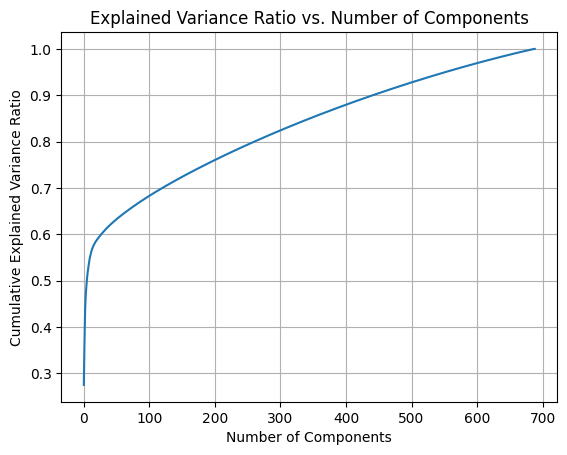

In [36]:
# Step 2: Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [37]:
# Step 3: Choose the number of components based on the plot or a threshold
threshold = 0.95  # Example threshold (95% of variance)
num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
print("Number of components to retain at least", threshold * 100, "% of the variance:", num_components)

Number of components to retain at least 95.0 % of the variance: 553


Q.No.3 Demonstrate skillful Model Training

3.1 Hyper parameter tuning

Hyperparameter tuning is a crucial step in optimizing the performance of machine learning models. It involves selecting the best set of hyperparameters for a model to achieve the highest accuracy or performance on the validation dataset.

In [38]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for each model
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1.0, 10.0]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

In [40]:
 #Perform grid search with cross-validation for each model
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_scaled, y)
    best_models[model_name] = grid_search.best_estimator_
    print("Best hyperparameters for", model_name, ":", grid_search.best_params_)


Best hyperparameters for Logistic Regression : {'C': 0.01}
Best hyperparameters for Random Forest : {'max_depth': 20, 'n_estimators': 100}


KeyboardInterrupt: 

Note: This code was taking very long time to execute so I interupt the execution

3.2 Train the machine learning models (at least 2 different models) with
Feature_set_1 and Feature_set_2 separately, then compare their
performances.

In [ ]:
#Feature set 1

In [52]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split the data into features (X) and target variable (y)
X_fs1 = DNA_data.loc[:, DNA_data.columns.str.startswith('cg')]
y_fs1 = DNA_metadata['Disease State']  # or 'Age' depending on the target variable

# Step 2: Preprocess the data if necessary (scaling)
scaler_fs1 = StandardScaler()
X_scaled_fs1 = scaler_fs1.fit_transform(X_fs1)

# Step 3: Split data into train and test sets
X_train_fs1, X_test_fs1, y_train_fs1, y_test_fs1 = train_test_split(X_scaled_fs1, y_fs1, test_size=0.2, random_state=42)

# Step 4: Train machine learning models (Logistic Regression, Random Forest, Gradient Boosting)
models_fs1 = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize dictionary to store model accuracies
accuracies_fs1 = {}

for model_name, model in models_fs1.items():
    model.fit(X_train_fs1, y_train_fs1)
    y_pred_fs1 = model.predict(X_test_fs1)
    accuracy_fs1 = accuracy_score(y_test_fs1, y_pred_fs1)
    accuracies_fs1[model_name] = accuracy_fs1

# Print model accuracies for Feature Set 1
print("Model Accuracies for Feature Set 1:")
for model_name, accuracy in accuracies_fs1.items():
    print(f"{model_name}: {accuracy:.4f}")


Model Accuracies for Feature Set 1:
Logistic Regression: 0.8768
Random Forest: 0.7971
Gradient Boosting: 0.8261


In [ ]:
#Feature set 2

In [53]:
# Step 1: Use PCA-reduced features
X_fs2 = X_pca  # Assuming X_pca is obtained from PCA for Feature Set 2
y_fs2 = DNA_metadata['Disease State']  # or 'Age' depending on the target variable

# Step 2: Split data into train and test sets (using the same split as Feature Set 1)
X_train_fs2, X_test_fs2, y_train_fs2, y_test_fs2 = train_test_split(X_fs2, y_fs2, test_size=0.2, random_state=42)

# Step 3: Train machine learning models (same models as Feature Set 1)
models_fs2 = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize dictionary to store model accuracies
accuracies_fs2 = {}

for model_name, model in models_fs2.items():
    model.fit(X_train_fs2, y_train_fs2)
    y_pred_fs2 = model.predict(X_test_fs2)
    accuracy_fs2 = accuracy_score(y_test_fs2, y_pred_fs2)
    accuracies_fs2[model_name] = accuracy_fs2

# Print model accuracies for Feature Set 2
print("\nModel Accuracies for Feature Set 2 (PCA-reduced Features):")
for model_name, accuracy in accuracies_fs2.items():
    print(f"{model_name}: {accuracy:.4f}")



Model Accuracies for Feature Set 2 (PCA-reduced Features):
Logistic Regression: 0.8768
Random Forest: 0.6232
Gradient Boosting: 0.7391


In [ ]:
# Compare model performance between Feature Set 1 and Feature Set 2

In [54]:

print("\nComparison of Model Performances:")
for model_name in models_fs1.keys():
    print(f"{model_name}:")
    print(f"  Feature Set 1 Accuracy: {accuracies_fs1[model_name]:.4f}")
    print(f"  Feature Set 2 Accuracy: {accuracies_fs2[model_name]:.4f}")
    print()



Comparison of Model Performances:
Logistic Regression:
  Feature Set 1 Accuracy: 0.8768
  Feature Set 2 Accuracy: 0.8768

Random Forest:
  Feature Set 1 Accuracy: 0.7971
  Feature Set 2 Accuracy: 0.6232

Gradient Boosting:
  Feature Set 1 Accuracy: 0.8261
  Feature Set 2 Accuracy: 0.7391



Q. No. 4 Data Visualization:
Implement meaningful data visualization techniques to enhance understanding and insight.


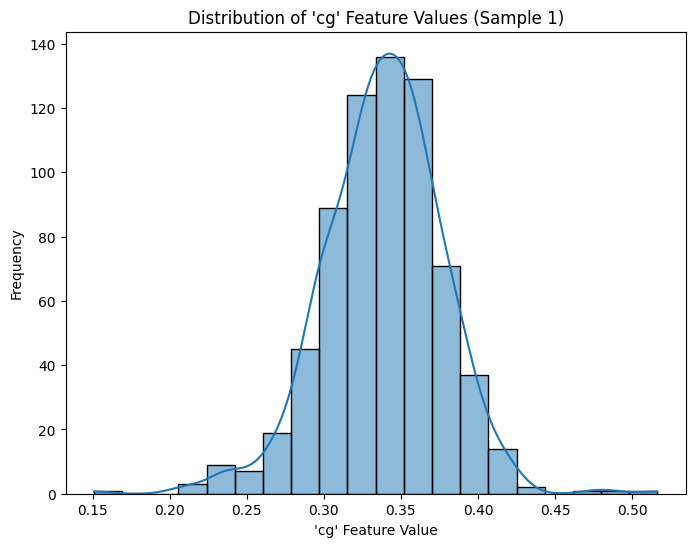

In [63]:
# Example: Plot distribution of gene expression values for the first 'cg' feature
plt.figure(figsize=(8, 6))
sns.histplot(DNA_data[cg_features].iloc[:, 0], bins=20, kde=True)
plt.title("Distribution of 'cg' Feature Values (Sample 1)")
plt.xlabel("'cg' Feature Value")
plt.ylabel("Frequency")
plt.show()

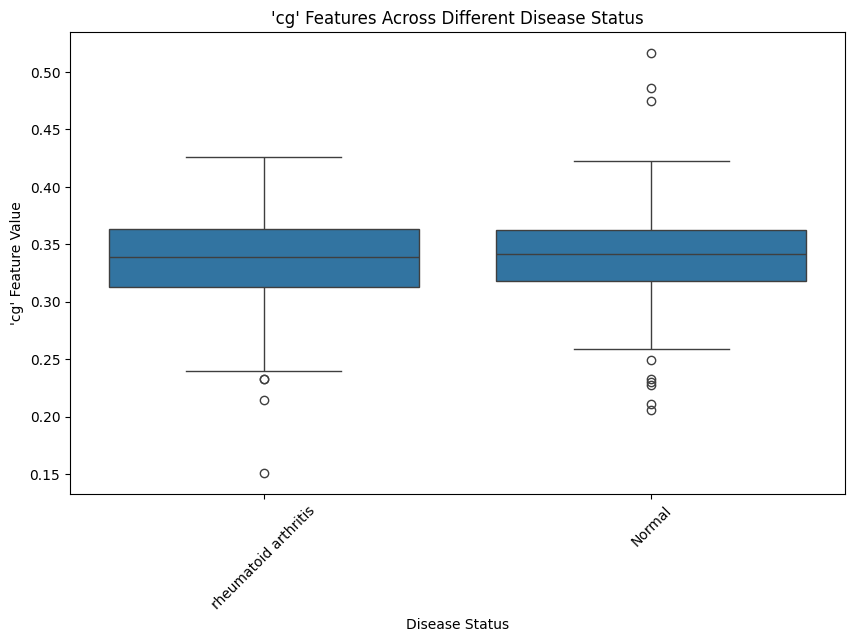

In [64]:
# Example: Visualize relationship between 'cg' features and 'Disease Status' or 'Age'
if 'Disease State' in DNA_metadata:
    # Box plot of 'cg' features across different disease status
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=DNA_metadata['Disease State'], y=DNA_data[cg_features].iloc[:, 0])
    plt.title("'cg' Features Across Different Disease Status")
    plt.xlabel("Disease Status")
    plt.ylabel("'cg' Feature Value")
    plt.xticks(rotation=45)
    plt.show()


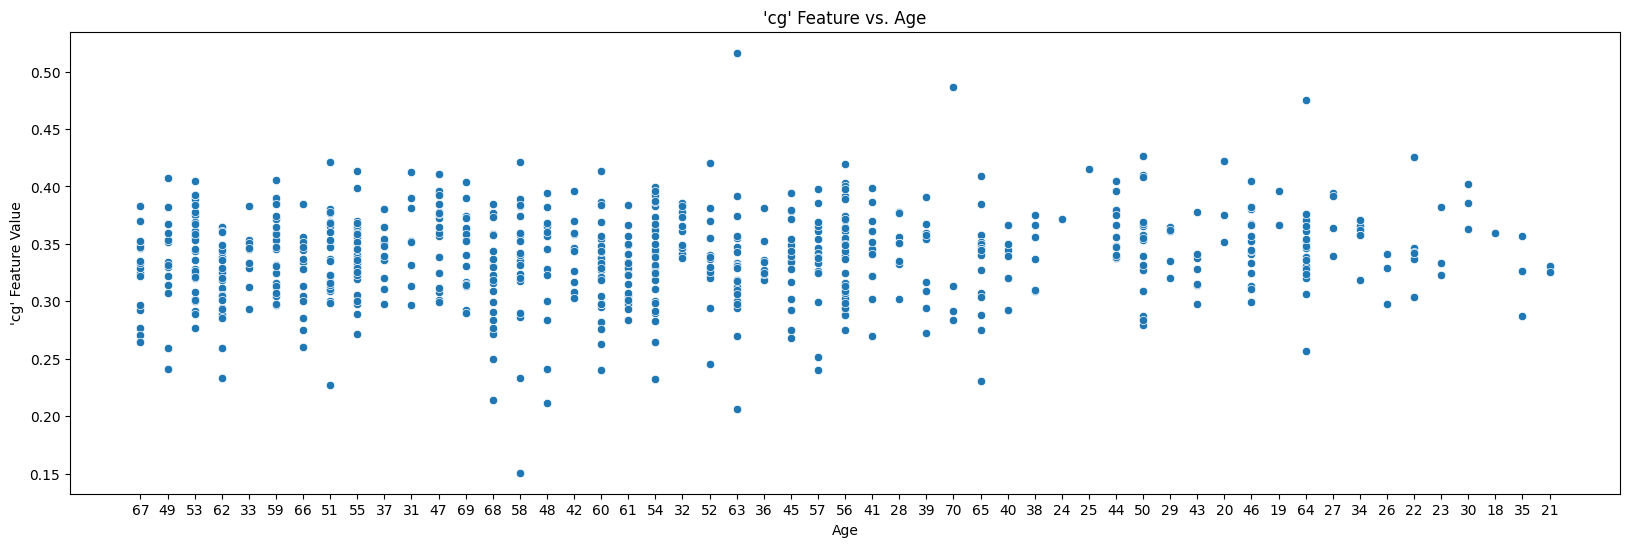

In [65]:
if 'Age' in DNA_metadata:
    # Scatter plot of 'cg' features against age
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=DNA_metadata['Age'], y=DNA_data[cg_features].iloc[:, 0])
    plt.title("'cg' Feature vs. Age")
    plt.xlabel("Age")
    plt.ylabel("'cg' Feature Value")
    plt.show()


Through the use of feature selection, dimensionality reduction, model training, hyperparameter tuning, and visualisation, this project showcases a thorough approach to DNA data analysis and machine learning. The project's goal is to use complicated DNA datasets to generate predictive models and insightful information.

In light of project objectives and domain requirements, think about improving particular areas, such as feature engineering, deployment strategies, and model selection, for future development.

Drawing from the available data, this synopsis encapsulates the principal features and goals of the undertaking. Please do not hesitate to ask for clarification or additional help if you have any specific questions or require more information on any aspect of the project!
